In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

%matplotlib inline

def combinations(n: int, k: int) -> int:
    """Число сочетаний.
    """
    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

#### Задача 1

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, 
один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. 
Найдите M(X), D(X).


$$P_n(X=k) = C_n^k p^k q^{n-k}$$

0.3955078125
0.263671875
0.087890625
0.0146484375
0.0009765625
𝑀(𝑋) = n*p = 5*0.25 = 1.25
𝐷(𝑋) = n*p*q = 5*0.25*0.75 = 0.9375


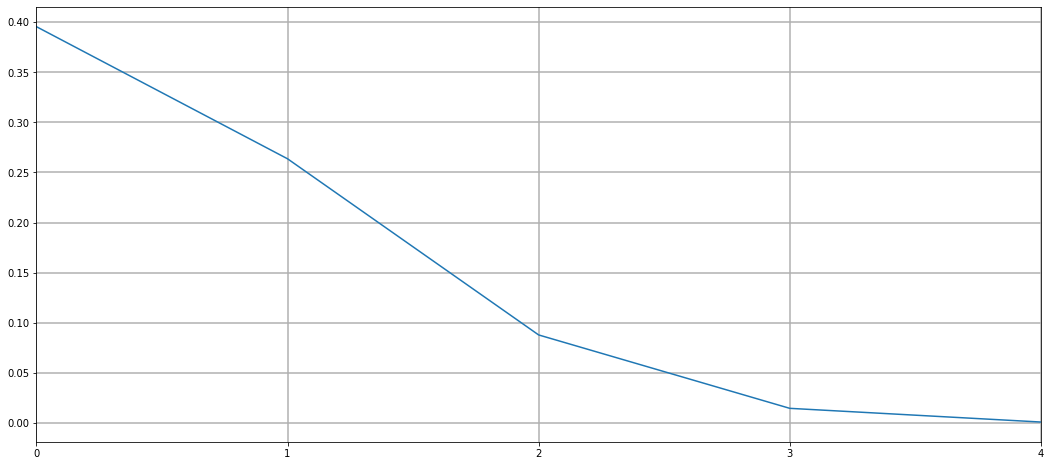

In [3]:
def disp_right(questions, right_asw, n): # функция, рассчитывающая число наступления событий
    p = right_asw / questions   # вероятность угадать правильный ответ
    q = 1 - p    # вероятность не угадать правильный ответ
    prob = []
    for k in range(1, n+1):        
        prob_x_k = combinations(n,k) * (p **k)*(q**(n-k))
        prob.append(prob_x_k)
        
    print(f'𝑀(𝑋) = n*p = {n}*{p} =',n*p)
    print(f'𝐷(𝑋) = n*p*q = {n}*{p}*{q} =',n*p*q)
    return prob

fig = plt.figure(figsize=(18,8))
xticks(range(0, 5))
xlim(0, 4)
grid(linewidth = 1.5)
plt.plot(disp_right(4, 1, 5))

#### Задача 2

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. 
Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.
$$P_m \approx \frac{\lambda^m}{m!}e^{-\lambda}$$

Pm = 0.95

𝜆 = Mx = 10 = n*p

считаем вероятность для разных N (m  в формуле) пока не найдем вероятность больше 0,95


In [6]:
def prob_count(m, 𝜆):
    prob = (𝜆**m)*np.exp(-𝜆)/np.math.factorial(m)
    return(prob)
i = -1
p = 0

while p < 0.95:
    i += 1
    p += prob_count(i, 10)
i, p


(15, 0.9512595966960214)

In [ ]:
Задача 3

Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. 
Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка. 
1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 
2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 
3) Здесь предстоит немножко покодить.

k=6 

p=0.01

p_x=0.9

n - будем перебирать

In [37]:
def prob_comb(p: float, k: int, n: int): # функция, рассчитывающая число наступления событий
    q = 1 - p
    prob_x_k = combinations(n,k) * (p **k)*(q**(n - k))        
    return prob_x_k


раз попасть нужно 6 раз, всего выстрелов будет больше, значит нужно просуммировать вероятность 6 попаданий и вероятность n-6 непопаданий

In [55]:
def sum_prob(p: float, k: int, n: int):
    sum = 0    
    for i in range(k, n + 1):
        sum += prob_comb(p, i, n)
    return sum

In [59]:
k = 6
p = 0.01
p_x = 0.9
n = 6
prob = 0
while prob < 0.9:
    n += 1
    prob = sum_prob(p, k, n)
print(f'result: n={n} for prob={prob}')

result: n=926 for prob=0.9003627121531275
